In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Dataset/Training.csv")

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Fungal infection
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [5]:
df.shape


(4920, 133)

In [6]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', nan, 'Bronchial Asthma', 'Hypertension ',
       'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)',
       'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid',
       'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)',
       'Heart attack', 'Varicose veins', 'Hypothyroidism',
       'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
len(df['prognosis'].unique())

42

In [8]:
# Check for missing values
print(df.isnull().sum())


itching                 207
skin_rash               276
nodal_skin_eruptions    246
continuous_sneezing     277
shivering               234
                       ... 
inflammatory_nails      251
blister                 239
red_sore_around_nose    238
yellow_crust_ooze       213
prognosis               219
Length: 133, dtype: int64


In [9]:
# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())


C:\Users\mohan\AppData\Local\Temp\ipykernel_1072\726182621.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_1072\726182621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])


In [11]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
X = df.drop("prognosis",axis=1)
y = df["prognosis"]

In [13]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1.0,1.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.022489,0.0,0.0,0.0
1,0.0,1.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,1.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,1.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.045571,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,1.0,1.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4916,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,1.0,1.000000,0.0,0.000000,0.0,0.022489,0.0,0.0,0.0
4917,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4918,0.0,1.000000,0.0,0.0,0.0,0.0,0.139833,0.0,0.000000,0.0,...,0.0,0.0,0.022355,1.0,0.023057,1.0,1.000000,0.0,0.0,0.0


In [14]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

In [15]:
le= LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [16]:
Y

array([15, 15, 15, ..., 38, 35, 27], shape=(4920,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [19]:
#MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,precision_score
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
predictions = rf.predict(X_test)

# Accuracy & confusion matrix
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy}")

cm = confusion_matrix(y_test, predictions)
print("Random Forest Confusion Matrix:")
print(np.array2string(cm, separator=', '))




Random Forest Accuracy: 0.9512195121951219
Random Forest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 39,  0, ...,  0,  0,  0],
 [ 0,  0, 26, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 32,  0,  0],
 [ 0,  0,  0, ...,  0, 39,  0],
 [ 0,  0,  0, ...,  0,  0, 28]]


In [20]:
# Recall score
recall = recall_score(y_test, predictions, average='weighted')
print(f"Random Forest Recall (weighted): {recall}")

Random Forest Recall (weighted): 0.9512195121951219


In [21]:
# F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Random Forest F1 Score (weighted): {f1}")

Random Forest F1 Score (weighted): 0.9408128075145784


In [22]:
# Precision score
precision = precision_score(y_test, predictions, average='weighted')
print(f"Random Forest Precision (weighted): {precision}")

Random Forest Precision (weighted): 0.9548674607853604


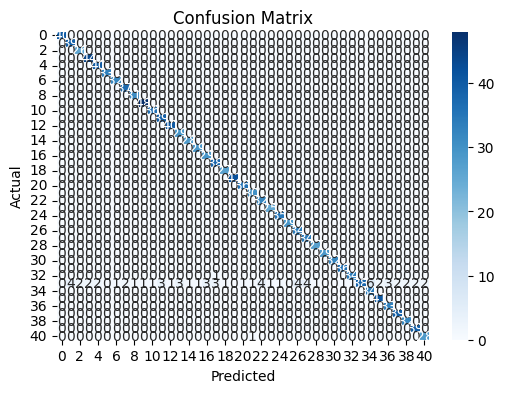

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      1.00      0.95        39
           2       0.93      1.00      0.96        26
           3       0.96      1.00      0.98        44
           4       0.95      1.00      0.98        40
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        32
           7       0.95      1.00      0.97        37
           8       0.97      1.00      0.98        31
           9       0.98      1.00      0.99        48
          10       0.97      1.00      0.99        36
          11       0.93      1.00      0.96        39
          12       0.98      1.00      0.99        40
          13       0.91      1.00      0.95        29
          14       0.97      1.00      0.98        28
          15       0.97      1.00      0.98        29
          16       0.91      1.00      0.95        29
          17       0.90    

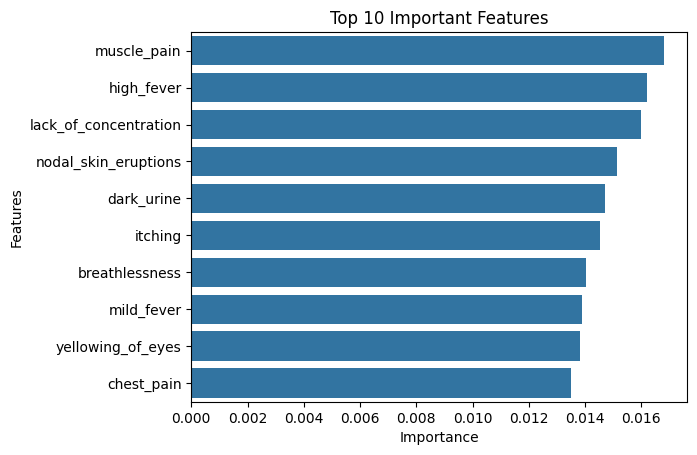

In [26]:
import pandas as pd
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns  # replace with your actual feature list
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 10
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



In [27]:
import pandas as pd

# Get the feature importances from the trained model
importances = rf.feature_importances_

# Get feature names from your dataset (ensure X is a DataFrame)
feature_names = X.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Total Gini Decrease': importances,
    'Normalized Importance (%)': importances * 100
})

# Sort by importance descending
importance_df = importance_df.sort_values(by='Total Gini Decrease', ascending=False)

# Round the values for presentation
importance_df = importance_df.round({'Total Gini Decrease': 4, 'Normalized Importance (%)': 2})

# Reset index for a clean display
importance_df = importance_df.reset_index(drop=True)

# Display the full DataFrame
print(importance_df.to_string(index=False))


                       Feature  Total Gini Decrease  Normalized Importance (%)
                   muscle_pain               0.0168                       1.68
                    high_fever               0.0162                       1.62
         lack_of_concentration               0.0160                       1.60
          nodal_skin_eruptions               0.0151                       1.51
                    dark_urine               0.0147                       1.47
                       itching               0.0145                       1.45
                breathlessness               0.0140                       1.40
                    mild_fever               0.0139                       1.39
             yellowing_of_eyes               0.0138                       1.38
                    chest_pain               0.0135                       1.35
                      vomiting               0.0135                       1.35
                family_history               0.0132 

In [28]:
#saving model
import pickle
#pickle.dump(rf,open("Model/rf.pkl",'wb'))

In [29]:
#load model
rf=pickle.load(open("Model/rf.pkl",'rb'))

In [25]:
# test 1:
print("predicted disease :",rf.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])



predicted disease : [40]
Actual Disease : 40


C:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
# test 2:
print("predicted disease :",rf.predict(X_test.iloc[10].values.reshape(1,-1)))
print("Actual Disease :", y_test[10])


predicted disease : [20]
Actual Disease : 20


C:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
#Recommendation System
sym_des = pd.read_csv("Dataset/symtoms_df.csv")
precautions = pd.read_csv("Dataset/precautions_df.csv")
workout = pd.read_csv("Dataset/workout_df.csv")
description = pd.read_csv("Dataset/description.csv")
medications = pd.read_csv('Dataset/medications.csv')
diets = pd.read_csv("Dataset/diets.csv")


In [28]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[rf.predict([input_vector])[0]]

In [29]:
# Test 1
 # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... itching,skin_rash,nodal_skin_eruptions


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


C:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Test 2
 # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1
    print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1



Enter your symptoms....... yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister


=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
=================medications==================
2 :  use antibiotics
=================medications==================
3 :  remove scabs with wet compressed cloth
=================medications==================
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care

C:\Users\mohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
import sklearn
print(sklearn.__version__)


1.6.1
